This Assignment  is done by : 
* Mohammed Youssef   T-3   46-17077
* Mohammed Shetewy   T-5   46-13908

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

 1- HeartDisease DataSet
-----

In [2]:
df = pd.read_csv('HeartDiseases.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.HeartDiseaseorAttack.unique()

array([0., 1.])

Our target/dependent variable is descrete, 1 represents having heart attack, and 0 represents not having a heart attack

In [7]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

As you can see, many people do not have heart attack compared to those who have

In [8]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

We do not have any null value

Now, let's deal with the data using two approaches :
* drop the features that has low correlation with the target variable, so we can run much faster 
* without dropping any feature

and we will compare between the accuracy for each model under each approach

1.1) drop some features
----

<Figure size 3600x3600 with 0 Axes>

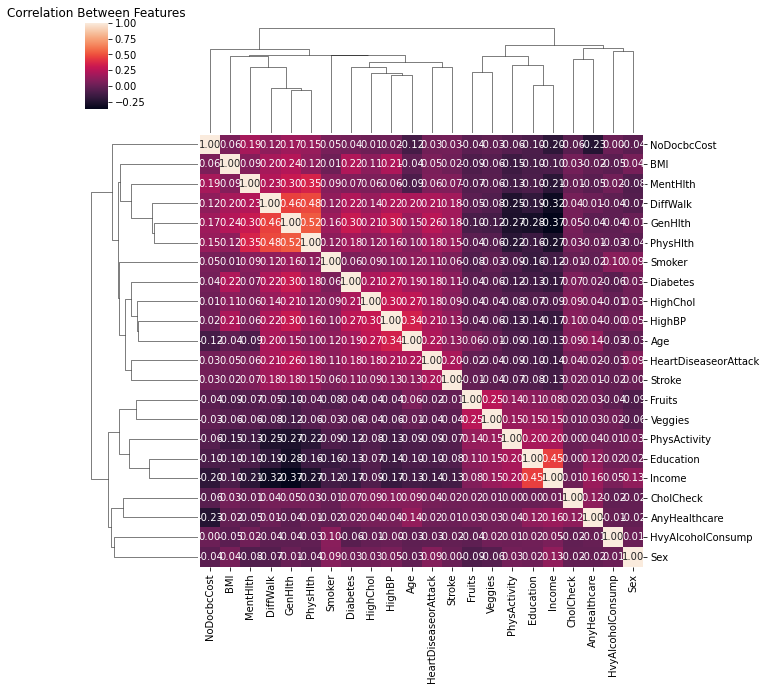

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.5')

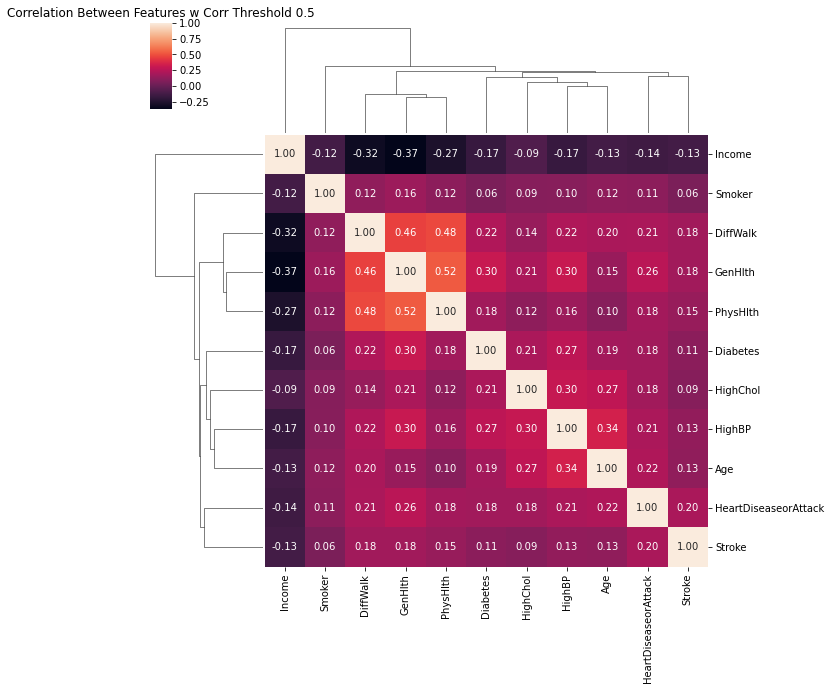

In [10]:
threshold = 0.1
filtre = np.abs(corr_matrix["HeartDiseaseorAttack"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.5")

In [11]:
#here, I collect all features that have a low correlation with the target variable.
# threshold here is equal to 0.1
filtre = np.abs(corr_matrix["HeartDiseaseorAttack"]) < threshold
low_corr_features = corr_matrix.columns[filtre].tolist()
low_corr_features

['CholCheck',
 'BMI',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'Sex',
 'Education']

In [12]:
# let's drop these features
df.drop(low_corr_features, axis=1, inplace=True)
df

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age,Income
0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,15.0,1.0,9.0,3.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,8.0
3,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,7.0
253676,0.0,1.0,1.0,0.0,0.0,2.0,4.0,0.0,1.0,11.0,4.0
253677,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,1.0


In [13]:
#let's see the number of duplicate rows
len(df)-len(df.drop_duplicates())

186779

In [14]:
df.groupby(df.columns.tolist(),as_index=False).size()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age,Income,size
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,70
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,40
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,71
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,95
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,99
...,...,...,...,...,...,...,...,...,...,...,...,...
66896,1.0,1.0,1.0,1.0,1.0,2.0,5.0,30.0,1.0,13.0,4.0,3
66897,1.0,1.0,1.0,1.0,1.0,2.0,5.0,30.0,1.0,13.0,5.0,5
66898,1.0,1.0,1.0,1.0,1.0,2.0,5.0,30.0,1.0,13.0,6.0,3
66899,1.0,1.0,1.0,1.0,1.0,2.0,5.0,30.0,1.0,13.0,7.0,1


In [15]:
#drop duplicates raws
df.drop_duplicates(keep='first', inplace=True)
len(df)

66901

In [77]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [79]:
scaler = StandardScaler()

In [80]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

1.1.A) Logistic Regression Model
-----

In [44]:
from sklearn.linear_model import LogisticRegression

In [299]:
log_model = LogisticRegression()

In [300]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [301]:
log_model.coef_

array([[ 0.21367366,  0.19593008,  0.16591741,  0.20058624,  0.06713468,
         0.3441854 , -0.06589659,  0.03283831,  0.54192149,  0.02733831]])

In [302]:
y_pred = log_model.predict(scaled_X_test)

In [303]:
accuracy_score(y_test,y_pred)

0.7782095351965327

In [304]:
confusion_matrix(y_test,y_pred)

array([[5068,  135],
       [1349,  139]], dtype=int64)

In [306]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      5203
         1.0       0.51      0.09      0.16      1488

    accuracy                           0.78      6691
   macro avg       0.65      0.53      0.52      6691
weighted avg       0.73      0.78      0.71      6691



1.1.B) KNN Model
-----

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [308]:
test_error_rates = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [309]:
test_error_rates

[0.4038260349723509,
 0.2594529965625467,
 0.30548497982364375,
 0.25138245404274395,
 0.27634135405768945,
 0.24346136601404877,
 0.25646390674039754,
 0.2383799133163952,
 0.24630100134509036,
 0.23554027798535349,
 0.24435809296069344,
 0.2338962785831714,
 0.23733373187864293,
 0.2297115528321626,
 0.23583918696756834,
 0.22776864444776568,
 0.23374682409206393,
 0.22597519055447612,
 0.22986100732327008,
 0.2268719175011209]

Text(0.5, 0, 'K Value')

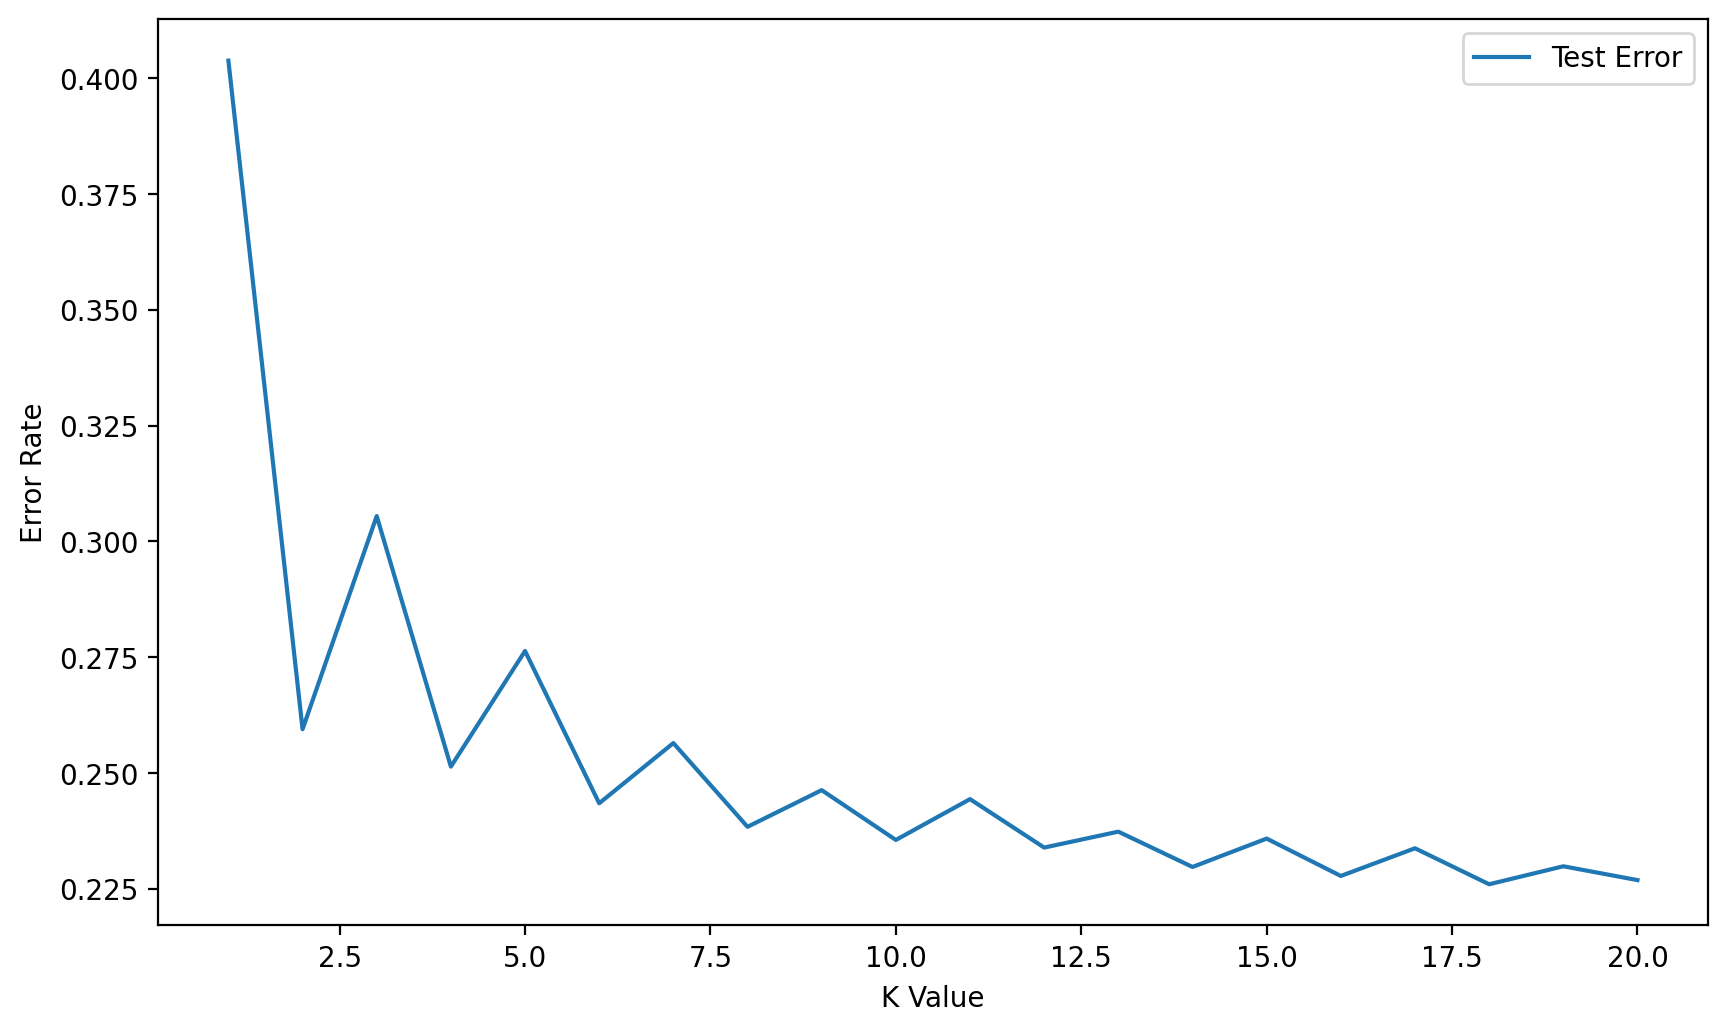

In [310]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Best K = 18

In [311]:
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [312]:
y_pred_test = knn_model.predict(scaled_X_test)

In [313]:
accuracy_score(y_test,y_pred_test)

0.7740248094455239

In [314]:
confusion_matrix(y_test,y_pred_test)

array([[5048,  155],
       [1357,  131]], dtype=int64)

In [315]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      5203
         1.0       0.46      0.09      0.15      1488

    accuracy                           0.77      6691
   macro avg       0.62      0.53      0.51      6691
weighted avg       0.71      0.77      0.71      6691



1.1.C) SVM Model
-----

In [21]:
from sklearn import svm # Supprt Vector Classifier
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV

Linear Kernel

In [316]:
param_grid = {'C':[0.5,1],
             'kernel':['linear'],
              'gamma':['scale','auto']}

In [24]:
svc = SVC()
grid = GridSearchCV(svc,param_grid=param_grid)

In [318]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']})

In [319]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [320]:
grid_preds = grid.predict(scaled_X_test)

In [321]:
accuracy_score(y_test,grid_preds)

0.7776117172321029

rbf Kernel

In [323]:
param_grid = {'C':[0.5,1],
             'kernel':['rbf'],
              'gamma':['scale','auto']}

In [324]:
grid = GridSearchCV(svc,param_grid=param_grid)

In [325]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

In [326]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [327]:
grid_preds = grid.predict(scaled_X_test)

In [328]:
accuracy_score(y_test,grid_preds)

0.7791062621431774

sigmoid Kernel

In [25]:
param_grid = {'C':[0.5,1],
             'kernel':['sigmoid'],
              'gamma':['scale','auto']}

In [26]:
grid = GridSearchCV(svc,param_grid=param_grid)

In [27]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['sigmoid']})

In [28]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [29]:
grid_preds = grid.predict(scaled_X_test)

In [30]:
accuracy_score(y_test,grid_preds)

0.7030339261694813

As you see that the first appraoch, which is dropping some features, does not give us high accuracy, the highest accuracy
over all the different models was 77%, which is too low as expected.

So, now let's see if the performance will change if we keep all columns or not 

2.2) Keep all features
-----

In [100]:
#let's read the data again
df = pd.read_csv('HeartDiseases.csv')
len(df)

253680

let's remove duplicate rows, if exist.

In [101]:
len(df)-len(df.drop_duplicates())

23899

we have 23899 duplicate samples, so we will drop them

In [102]:
df.drop_duplicates(keep='first', inplace=True)
len(df)

229781

In [103]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [113]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

1.2.A) Logistic Regression Model
------

In [106]:
log_model = LogisticRegression()

In [107]:
log_model = log_model.fit(scaled_X_train,y_train)

In [108]:
log_model.coef_

array([[ 2.51556673e-01,  3.01454075e-01,  1.12258030e-01,
        -2.35989960e-03,  1.70948894e-01,  2.00426343e-01,
         1.00950158e-01,  2.16117978e-02,  1.39796288e-02,
         2.46570467e-02, -8.46645775e-02, -4.23654890e-04,
         7.24751452e-02,  4.96634456e-01,  2.00442244e-02,
         6.55296307e-03,  1.19324507e-01,  3.80147188e-01,
         7.73450493e-01,  1.95037890e-02, -7.55957466e-02]])

In [109]:
y_pred = log_model.predict(scaled_X_test)

In [110]:
accuracy_score(y_pred,y_test)

0.8958179207102137

In [111]:
confusion_matrix(y_test,y_pred)

array([[20299,   237],
       [ 2157,   286]], dtype=int64)

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     20536
         1.0       0.55      0.12      0.19      2443

    accuracy                           0.90     22979
   macro avg       0.73      0.55      0.57     22979
weighted avg       0.87      0.90      0.86     22979



As we can see, the accuracy without removing any feature is 89.5% which is much better than 77.8% after removing features

1.2.B) KNN Model
-----

In [116]:
test_error_rates = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [117]:
test_error_rates

[0.15727403281256802,
 0.11249401627572997,
 0.12494016275730013,
 0.11018756255711737,
 0.11767265764393575,
 0.10923016667391972,
 0.11301623221201962,
 0.1073153749075243,
 0.11010052656773572,
 0.10748944688628748,
 0.10822925279603113,
 0.106706122981853,
 0.106488533008399,
 0.10535706514643806,
 0.10618390704556335,
 0.10487836720483923,
 0.10605335306149088,
 0.10500892118891159,
 0.10548761913051041,
 0.10466077723138523]

Text(0.5, 0, 'K Value')

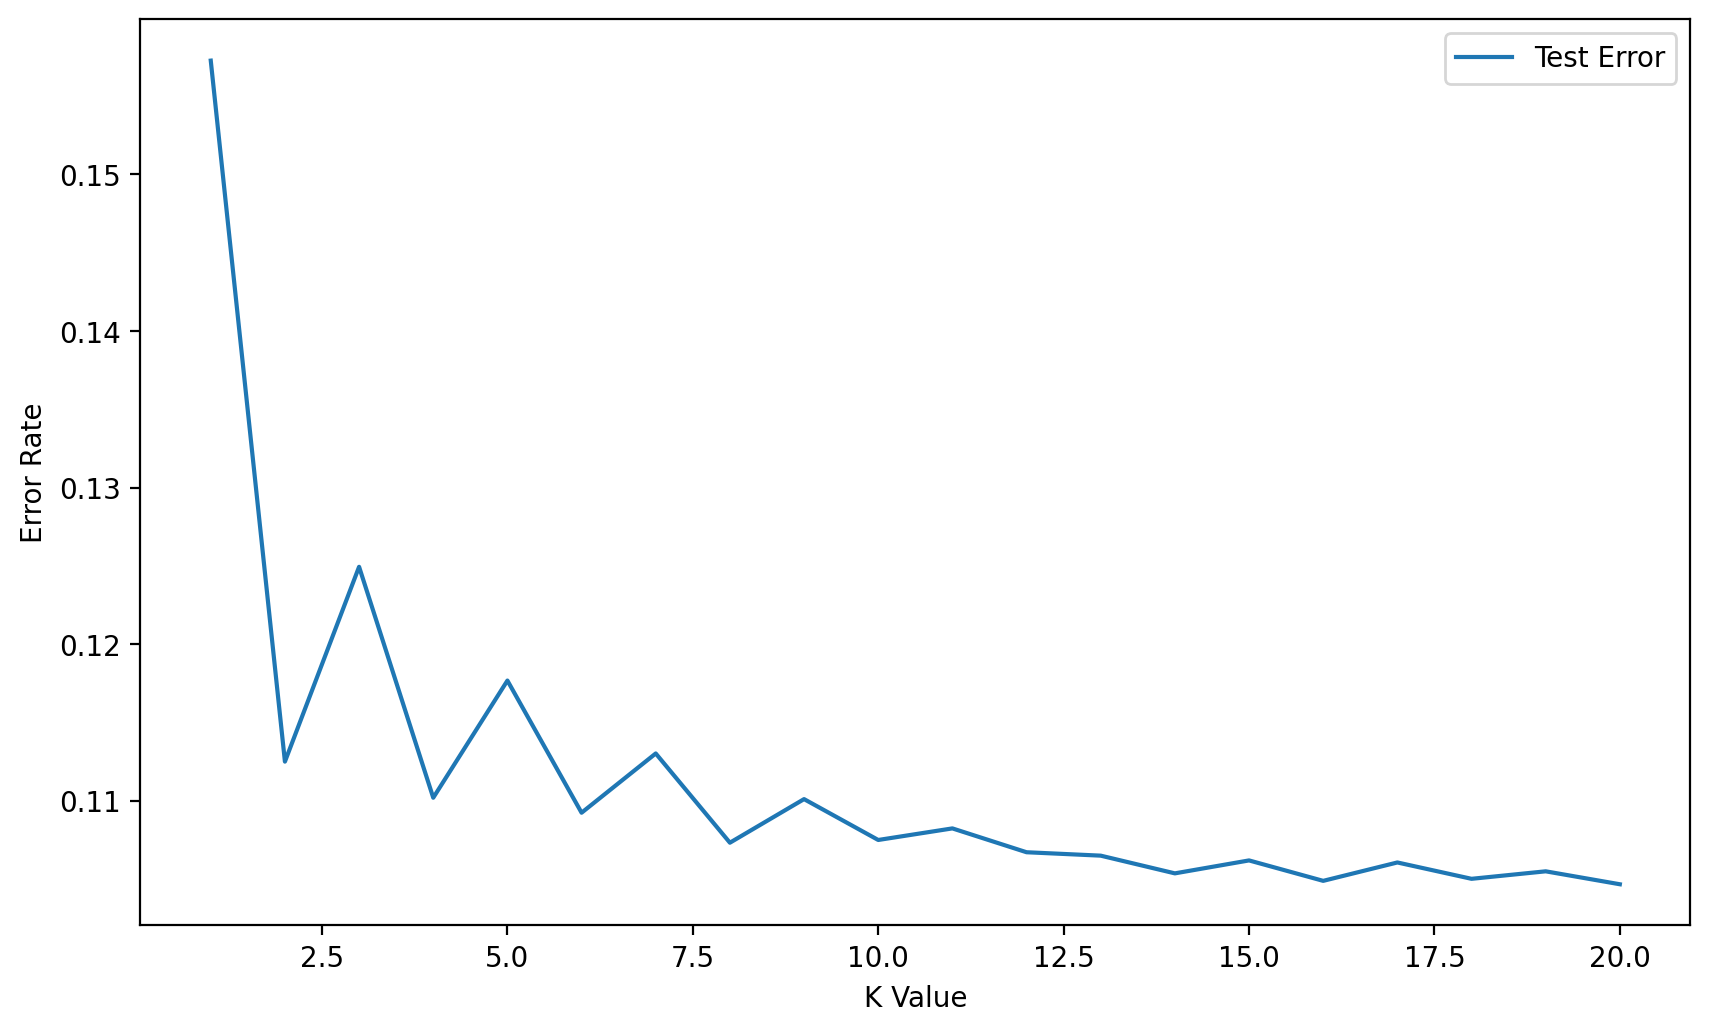

In [118]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

As we can see, all values greater than 15 has a bit similar error rate
let's pick k = 20 to be the best K value

In [122]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model = knn_model.fit(scaled_X_train,y_train)

In [123]:
y_pred_test = knn_model.predict(scaled_X_test)

In [127]:
accuracy_score(y_test,y_pred_test)

0.8953392227686148

In [128]:
confusion_matrix(y_test,y_pred_test)

array([[20370,   166],
       [ 2239,   204]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     20536
         1.0       0.55      0.12      0.19      2443

    accuracy                           0.90     22979
   macro avg       0.73      0.55      0.57     22979
weighted avg       0.87      0.90      0.86     22979



1.2.C) SVM Model
-----

In [131]:
from sklearn import svm # Supprt Vector Classifier
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV

Linear Kernel

In [134]:
param_grid = {'C':[1],
             'kernel':['linear'],
              'gamma':['scale','auto']}

In [135]:
svc = SVC()
grid = GridSearchCV(svc,param_grid=param_grid)

In [136]:
grid = grid.fit(scaled_X_train,y_train)

In [137]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [138]:
grid_preds = grid.predict(scaled_X_test)

In [139]:
accuracy_score(y_test,grid_preds)

0.8936855389703643

In [142]:
confusion_matrix(y_test,grid_preds)

array([[20536,     0],
       [ 2443,     0]], dtype=int64)

Classification report for linear svm as it has the highest accuracy compared to rbf and segmoid as shown in the below cells 

In [143]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     20536
         1.0       0.00      0.00      0.00      2443

    accuracy                           0.89     22979
   macro avg       0.45      0.50      0.47     22979
weighted avg       0.80      0.89      0.84     22979



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above warning is not an error, it just because not all lebels are included in grid_preds

rbf Kernel

In [182]:
param_grid = {'C':[0.5,1],
             'kernel':['rbf'],
              'gamma':['scale','auto']}

In [183]:
svc = SVC()
grid = GridSearchCV(svc,param_grid=param_grid)

In [184]:
grid = grid.fit(scaled_X_train,y_train)

In [185]:
grid_preds = grid.predict(scaled_X_test)

In [192]:
accuracy_score(y_test,grid_preds)

0.8633333333333334

segmoid Kernel

In [193]:
param_grid = {'C':[0.5,1],
             'kernel':['sigmoid'],
              'gamma':['scale','auto']}

In [194]:
grid = GridSearchCV(svc,param_grid=param_grid)

In [195]:
grid = grid.fit(scaled_X_train,y_train)

In [196]:
grid_preds = grid.predict(scaled_X_test)

In [202]:
accuracy_score(y_test,grid_preds)

0.8366666666666667

Linear vs rbf vs Sigmoid
* Linear has accuracy equals 89.3%
* rbf has accuracy equals 86.3%
* sigmoid has accuracy equals 83.6%

so we choose the linear kernel as it has the highest accuracy. 
Also we can notice that the accuracy for svm increases to be 89.3 for the linear kernel, which is much greater than 77% for the first approach

1.D) Comments
---

Let's recap on the performance in terms of accuracy score of each model for the sceond approach : 
* Logistic Regression gives accuracy equals 89.6%
* KNN gives accuracy equals 89.5%
* SVM gives accuracy equals 89.3%

So, we choose the Logistic Regression model to be the best out of them, as it has the highest accuracy

Also we can notice that the accuracy for any model in the second approach (keep the features) is much higher than
the accuracy in the first approach (drop some features), which indicates that the features we dropped in the first approach
are important for our target variable.

###########################################################################################################################

2- Income DataSet
-----

In [266]:
df = pd.read_csv('train.csv')

In [267]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [269]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [270]:
df["income_>50K"].unique()

array([1, 0], dtype=int64)

In [271]:
df["income_>50K"].value_counts()

0    33439
1    10518
Name: income_>50K, dtype: int64

In [272]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [273]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [274]:
def plot_missing_percentage(percent_nan):
    if(len(percent_nan) != 0):
        sns.barplot(x=percent_nan.index,y=percent_nan)
        plt.xticks(rotation=90);

In [275]:
percent_nan = percent_missing(df)
percent_nan

native-country    1.735787
workclass         5.682826
occupation        5.701026
dtype: float64

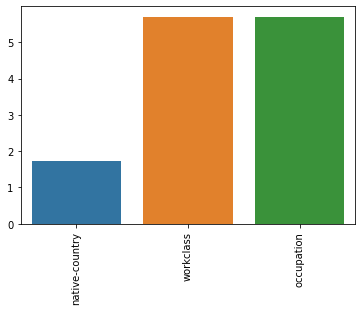

In [276]:
plot_missing_percentage(percent_nan)

In [277]:
nulls = []
for index, row in df.iterrows():
    if(pd.isnull(row["native-country"]) or pd.isnull(row["workclass"]) or pd.isnull(row["occupation"])):
        nulls.append(index)
        df = df.drop(labels=index, axis=0)

In [278]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

let's deal with the categorical columns by encoding them using one hot encoding method

In [279]:
categorical_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 
                       'gender','native-country']


In [280]:
df = pd.get_dummies(df, columns = categorical_columns)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [282]:
X = df.drop('income_>50K',axis=1)
y = df['income_>50K']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [284]:
scaler = StandardScaler()

In [285]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

2.A) Logistic Regression
----

In [286]:
from sklearn.linear_model import LogisticRegression

In [287]:
logistic_model = LogisticRegression()

In [288]:
logistic_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [289]:
logistic_model.coef_

array([[ 3.47357145e-01,  7.98156488e-02,  3.43955655e-01,
         2.43968077e+00,  2.48011642e-01,  3.43210132e-01,
         1.01876586e-01, -1.10239093e-02,  4.32238574e-02,
         4.78398590e-02, -1.25518063e-01, -3.77210088e-02,
        -2.93900457e-02, -8.62590038e-02, -1.00473331e-01,
        -4.85061107e-02, -3.65901217e-02, -3.37196834e-02,
        -1.22077674e-01, -8.97795398e-02,  2.22622172e-03,
         1.44297997e-03,  1.54453433e-01,  8.45693103e-02,
        -9.26577536e-02,  1.40912789e-01, -1.87030099e-01,
         1.35713444e-01,  1.14113336e-02, -2.28768130e-01,
         3.60686569e-02,  7.18675724e-01, -4.72259261e-02,
        -5.11598090e-01, -1.15491404e-01, -9.67313770e-02,
        -2.87312872e-02,  1.87864697e-03,  1.16038634e-02,
         2.45058452e-01, -1.65626561e-01, -1.24435718e-01,
        -1.00569240e-01, -2.69397076e-01, -1.74529079e-01,
         1.63320271e-01,  6.92436324e-02,  7.39294389e-02,
         9.89404479e-02, -3.80062838e-02, -1.49397901e-0

In [290]:
y_pred = logistic_model.predict(scaled_X_test)

In [291]:
accuracy_score(y_pred,y_test)

0.8541615516818071

In [292]:
confusion_matrix(y_test,y_pred)

array([[2861,  212],
       [ 382,  618]], dtype=int64)

In [293]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3073
           1       0.74      0.62      0.68      1000

    accuracy                           0.85      4073
   macro avg       0.81      0.77      0.79      4073
weighted avg       0.85      0.85      0.85      4073



2.B) KNN Model
------

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
test_error_rates = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [53]:
test_error_rates

[0.20476307390130122,
 0.18585808986005403,
 0.176037318929536,
 0.171126933464277,
 0.17235452983059174,
 0.16916277927817336,
 0.16842622145838448,
 0.16670758654554385,
 0.16891726000491036,
 0.16449791308617723,
 0.16744414436533273,
 0.16400687453965135,
 0.16597102872575498,
 0.16204272035354772,
 0.16400687453965135,
 0.16449791308617723,
 0.1652344709059661,
 0.16327031671986247,
 0.16719862509206973,
 0.16474343235944022]

Text(0.5, 0, 'K Value')

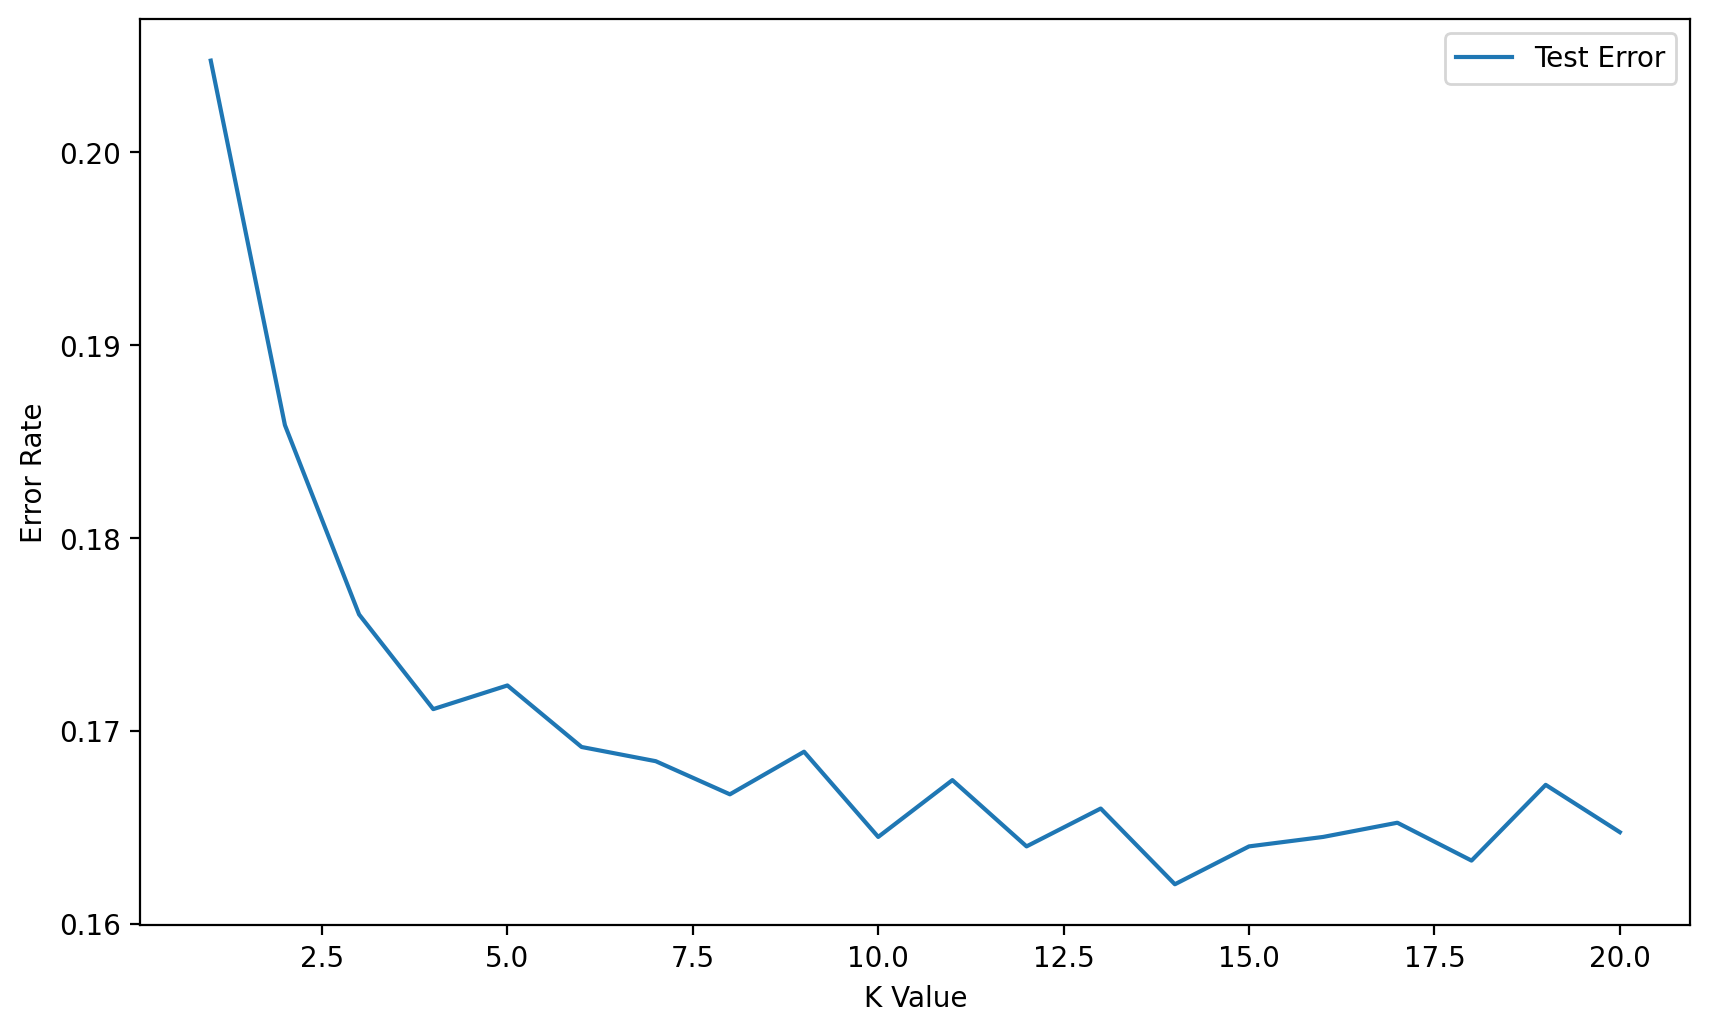

In [55]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Best K = 14

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [58]:
y_pred_test = knn_model.predict(scaled_X_test)

In [59]:
accuracy_score(y_test,y_pred_test)

0.8379572796464523

In [60]:
confusion_matrix(y_test,y_pred_test)

array([[2865,  208],
       [ 452,  548]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3073
           1       0.72      0.55      0.62      1000

    accuracy                           0.84      4073
   macro avg       0.79      0.74      0.76      4073
weighted avg       0.83      0.84      0.83      4073



2.C) SVM Model
-----

In [294]:
from sklearn import svm # Supprt Vector Classifier
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV

Linear Kernel

In [295]:
param_grid = {'C':[0.5,1],
             'kernel':['linear'],
              'gamma':['scale','auto']}

In [296]:
svc = SVC()
grid1 = GridSearchCV(svc,param_grid=param_grid)

In [297]:
grid1.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']})

In [298]:
grid1.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [299]:
grid_preds1 = grid1.predict(scaled_X_test)

In [300]:
accuracy_score(y_test,grid_preds1)

0.8553891480481218

rbf Kernel

In [74]:
param_grid = {'C':[0.5,1],
             'kernel':['rbf'],
              'gamma':['scale','auto']}

In [75]:
grid = GridSearchCV(svc,param_grid=param_grid)

In [76]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

In [77]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [78]:
grid_preds = grid.predict(scaled_X_test)

In [82]:
accuracy_score(y_test,grid_preds)

0.85440707095507

Segmoid Kernel

In [87]:
param_grid = {'C':[0.5,1],
             'kernel':['sigmoid'],
              'gamma':['scale','auto']}

In [88]:
grid = GridSearchCV(svc,param_grid=param_grid)

In [89]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['sigmoid']})

In [90]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [91]:
grid_preds = grid.predict(scaled_X_test)

In [92]:
accuracy_score(y_test,grid_preds)

0.8313282592683525

Linear vs rbf vs Sigmoid
* Linear has accuracy equals 85.5%
* rbf has accuracy equals 85.4%
* sigmoid has accuracy equals 83.1%

so we choose the linear kernel as it has the highest accuracy

In [301]:
confusion_matrix(y_test,grid_preds1)

array([[2885,  188],
       [ 401,  599]], dtype=int64)

Classification report for linear kernel as it is the best kernel because it has the highest accuracy

In [302]:
print(classification_report(y_test,grid_preds1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3073
           1       0.76      0.60      0.67      1000

    accuracy                           0.86      4073
   macro avg       0.82      0.77      0.79      4073
weighted avg       0.85      0.86      0.85      4073



2.D) Comments
-----

Let's recap on the performance in terms of accuracy score of each model : 
* Logistic Regression gives accuracy equals 85.4%
* KNN gives accuracy equals 83.7%
* SVM gives accuracy equals 85.5%

So, we choose SVM model to be the best out of them, as it has the highest accuracy.
Also we can consider logistic regression model as it also has high accuracy and has another advantage over svm model
which is minimum time to be trained

###########################################################################################################################

3- Gene Expression Dataset
---

In [33]:
df = pd.read_csv('gene_expression.csv')

In [34]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [36]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [37]:
df["Cancer Present"].unique()

array([1, 0], dtype=int64)

In [38]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [39]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [40]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [42]:
scaler = StandardScaler()

In [43]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

3.A) Logistic Regression Model
-----

In [236]:
log_model = LogisticRegression()

In [237]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [238]:
log_model.coef_

array([[ 1.11718777, -2.3076671 ]])

In [239]:
y_pred = log_model.predict(scaled_X_test)

In [240]:
accuracy_score(y_test,y_pred)

0.8466666666666667

In [241]:
confusion_matrix(y_test,y_pred)

array([[113,  23],
       [ 23, 141]], dtype=int64)

In [242]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       136
           1       0.86      0.86      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



3.B) KNN Model
----

In [44]:
test_error_rates = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [45]:
test_error_rates

[0.07666666666666666,
 0.10333333333333339,
 0.09333333333333338,
 0.09666666666666668,
 0.07999999999999996,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08333333333333337,
 0.08666666666666667,
 0.07999999999999996,
 0.09333333333333338,
 0.08999999999999997,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.06999999999999995,
 0.07333333333333336]

Text(0.5, 0, 'K Value')

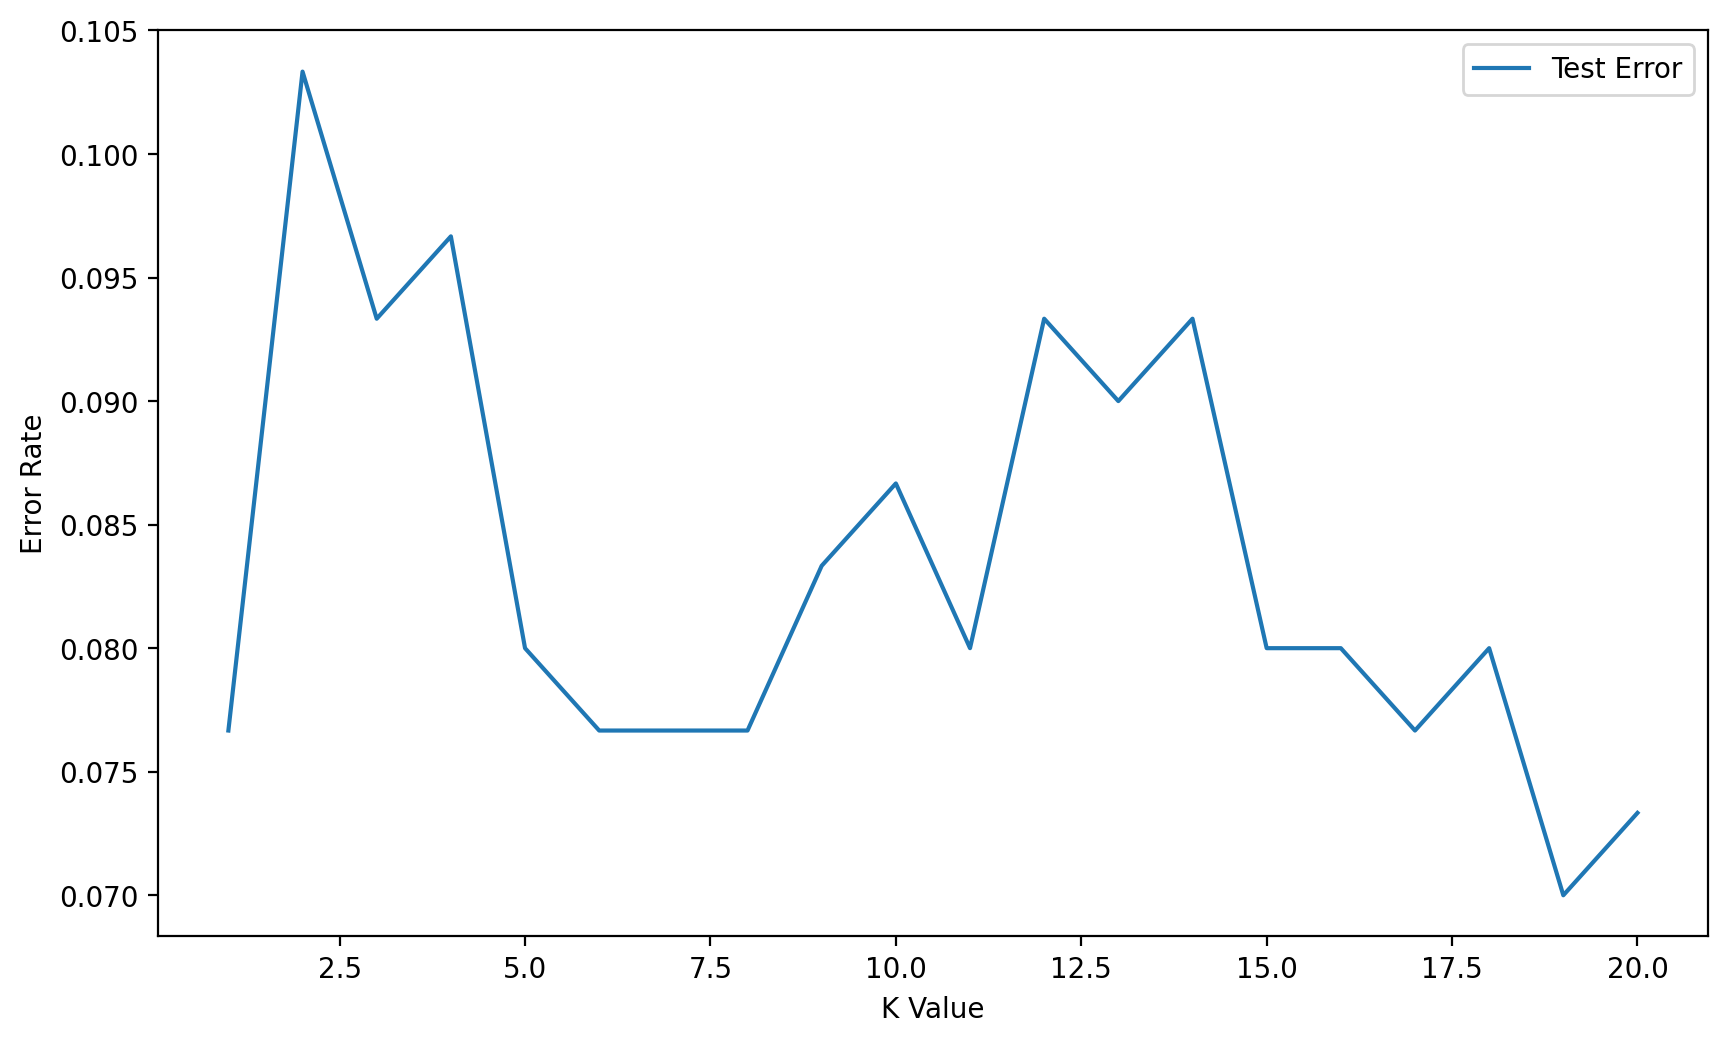

In [46]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Best k = 19

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [86]:
y_pred_test = knn_model.predict(scaled_X_test)

In [87]:
accuracy_score(y_test,y_pred_test)

0.93

In [88]:
confusion_matrix(y_test,y_pred_test)

array([[125,  11],
       [ 10, 154]], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       136
           1       0.93      0.94      0.94       164

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



3.C) SVM Model
-----

Linear Kernel

In [243]:
param_grid = {'C':[0.5,1],
             'kernel':['linear'],
              'gamma':['scale','auto']}

In [244]:
svc = SVC()
grid1 = GridSearchCV(svc,param_grid=param_grid)

In [245]:
grid1.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']})

In [246]:
grid_preds1 = grid1.predict(scaled_X_test)

In [247]:
accuracy_score(y_test,grid_preds1)

0.8433333333333334

rbf Kernel

In [248]:
param_grid = {'C':[0.5,1],
             'kernel':['rbf'],
              'gamma':['scale','auto']}

In [249]:
grid2 = GridSearchCV(svc,param_grid=param_grid)

In [250]:
grid2.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

In [251]:
grid_preds2 = grid2.predict(scaled_X_test)

In [252]:
accuracy_score(y_test,grid_preds2)

0.91

Sigmoid Kernel

In [258]:
param_grid = {'C':[0.5,1],
             'kernel':['sigmoid'],
              'gamma':['scale','auto']}

In [259]:
grid3 = GridSearchCV(svc,param_grid=param_grid)

In [260]:
grid3.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['sigmoid']})

In [261]:
grid_preds3 = grid3.predict(scaled_X_test)

In [262]:
accuracy_score(y_test,grid_preds3)

0.6666666666666666

Linear vs rbf vs Sigmoid
* Linear has accuracy equals 84.3%
* rbf has accuracy equals 91%
* sigmoid has accuracy equals 66.6%

so we choose the rbf kernel as it has the highest accuracy

In [263]:
confusion_matrix(y_test,grid_preds2)

array([[121,  15],
       [ 12, 152]], dtype=int64)

Classification report for rbf kernel as it is the best kernel because it has the highest accuracy

In [264]:
print(classification_report(y_test,grid_preds2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       136
           1       0.91      0.93      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



3.D) Comments
---

Let's recap on the performance in terms of accuracy score of each model : 
* Logistic Regression gives accuracy equals 84.6%
* KNN gives accuracy equals 93%
* SVM gives accuracy equals 91%

So, we choose the KNN model to be the best out of them, as it has the highest accuracy

##########################################################################################################################